In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    #used to standardize and fit the data to a comman scale
from sklearn import svm    #svm = support vector machine
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [4]:
#number of missing values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#dropping the missing values
data = data.dropna()

In [6]:
#number of missing values in each column
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
#label encoding
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [9]:
#dependent column values
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [10]:
#replacing value of 3+ to 4
data = data.replace(to_replace = "3+", value = 3)

In [11]:
data['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

## DATA VISUALIZATION

<AxesSubplot:xlabel='Education', ylabel='count'>

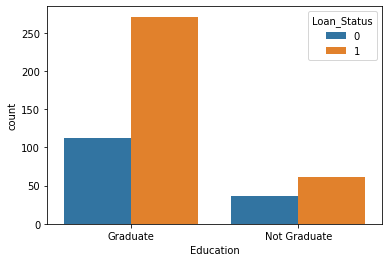

In [12]:
#finding relations between the columns and loan_status
sns.countplot(x='Education', hue='Loan_Status', data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

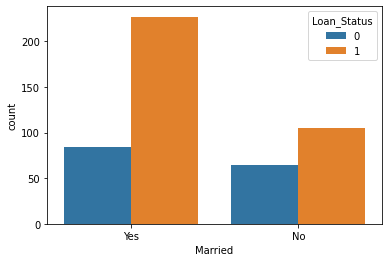

In [13]:
sns.countplot(x='Married', hue='Loan_Status', data=data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

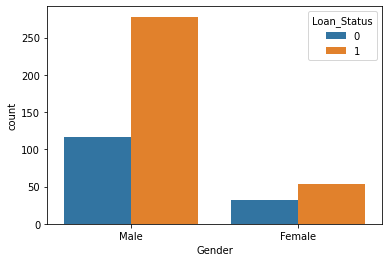

In [14]:
sns.countplot(x='Gender', hue='Loan_Status', data=data)

In [15]:
#convert categorical columns to numerical values
data.replace({"Married":{'No':0,'Yes':1}, "Gender":{'Female':0,'Male':1}, "Self_Employed":{'No':0,'Yes':1}, 
              "Self_Employed":{'No':0,'Yes':1}, "Property_Area":{'Rural':0,'Semiurban':1, 'Urban':2},
             "Education":{'Not Graduate':0,'Graduate':1}},inplace=True)

In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [17]:
#seperation data and labels
X = data.drop(columns=['Loan_ID', 'Loan_Status'], axis = 1)
Y = data['Loan_Status']

In [18]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

## TRAIN TEST SPLITTING

In [19]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


## Training the model: Support Vector Machine Model

In [20]:
classifier = svm.SVC(kernel='linear')

In [21]:
#training the support Vector Macine model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## MODEL EVALUATION

In [22]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [23]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7685185185185185


In [24]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [25]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8541666666666666


In [26]:
print(X_test)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
368       1        1          1          1              0             6325   
74        1        1          3          1              1             5266   
135       1        1          3          1              0             4000   
53        1        1          2          1              0             4616   
96        0        1          0          1              0             2484   
388       1        1          0          1              0             2333   
345       1        1          0          1              0             2499   
8         1        1          2          1              0             4006   
549       1        1          0          1              0             2785   
99        1        1          0          1              0             1759   
49        0        0          0          1              0             4000   
513       1        1          0          1              0       

## PREDICTION SYSTEM

In [27]:
input_data = X_test

prediction = classifier.predict(input_data)
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1]


## SAVING OUT MODEL

In [28]:
from joblib import dump, load
dump(classifier, 'model.joblib')

['model.joblib']